# 21 read_n

In [1]:
# write a generator function, read_n, takes filename and number (n)
# each iter the generator should return n lines from the file, if not n lines remaining, return as many as possible

for one_line in open("/etc/passwd"):
    print(one_line)

##

# User Database

# 

# Note that this file is consulted directly only when the system is running

# in single-user mode.  At other times this information is provided by

# Open Directory.

#

# See the opendirectoryd(8) man page for additional information about

# Open Directory.

##

nobody:*:-2:-2:Unprivileged User:/var/empty:/usr/bin/false

root:*:0:0:System Administrator:/var/root:/bin/sh

daemon:*:1:1:System Services:/var/root:/usr/bin/false

_uucp:*:4:4:Unix to Unix Copy Protocol:/var/spool/uucp:/usr/sbin/uucico

_taskgated:*:13:13:Task Gate Daemon:/var/empty:/usr/bin/false

_networkd:*:24:24:Network Services:/var/networkd:/usr/bin/false

_installassistant:*:25:25:Install Assistant:/var/empty:/usr/bin/false

_lp:*:26:26:Printing Services:/var/spool/cups:/usr/bin/false

_postfix:*:27:27:Postfix Mail Server:/var/spool/postfix:/usr/bin/false

_scsd:*:31:31:Service Configuration Service:/var/empty:/usr/bin/false

_ces:*:32:32:Certificate Enrollment Service:/var/empty:/usr/bin/fal

In [11]:
def read_n(filename, n):              
    f = open(filename)
    
    while True:
        one_chunk = ''.join(f.readline() for i in range(n))   # repeatedly get lines 
        if one_chunk:                                         # if we don't get empty string
            yield one_chunk
        else:
            break
        
for one_chunk in read_n("/etc/passwd", 3):
    print(one_chunk)

##
# User Database
# 

# Note that this file is consulted directly only when the system is running
# in single-user mode.  At other times this information is provided by
# Open Directory.

#
# See the opendirectoryd(8) man page for additional information about
# Open Directory.

##
nobody:*:-2:-2:Unprivileged User:/var/empty:/usr/bin/false
root:*:0:0:System Administrator:/var/root:/bin/sh

daemon:*:1:1:System Services:/var/root:/usr/bin/false
_uucp:*:4:4:Unix to Unix Copy Protocol:/var/spool/uucp:/usr/sbin/uucico
_taskgated:*:13:13:Task Gate Daemon:/var/empty:/usr/bin/false

_networkd:*:24:24:Network Services:/var/networkd:/usr/bin/false
_installassistant:*:25:25:Install Assistant:/var/empty:/usr/bin/false
_lp:*:26:26:Printing Services:/var/spool/cups:/usr/bin/false

_postfix:*:27:27:Postfix Mail Server:/var/spool/postfix:/usr/bin/false
_scsd:*:31:31:Service Configuration Service:/var/empty:/usr/bin/false
_ces:*:32:32:Certificate Enrollment Service:/var/empty:/usr/bin/false

_appstore:

# 22 Fibonacci

In [14]:
# 0 1 1 2 3 5 8 13 21 34 55 89 ...
# write a function that returns the nth fibonacci number
# fib(5) = 5

def fib():
    first = 0
    second = 1
    while True:
        yield first                           # yield 
        first, second = second, first+second   

In [15]:
g = fib()

In [17]:
next(g)

0

In [18]:
next(g)

1

In [19]:
next(g)

1

In [20]:
next(g)

2

In [23]:
for num in fib():
    print(num, end=' ')
    if num > 5000000:
        break

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 121393 196418 317811 514229 832040 1346269 2178309 3524578 5702887 

In [35]:
def fibn(n):
    for idx, num in enumerate(fib()):
        if idx == n:
            return num
        idx += 1

In [36]:
fibn(12)

144

# 23 What is self?

In [1]:
class Person():
    def __init__(self, name):
        self.name = name
    
    def greet(self):
        return f'Hello, {self.name}'

p = Person('Reuven')
p.greet()

'Hello, Reuven'

In [ ]:
# (1) self is a parameter in each method - it is a local variable
# (2) self is a convention -- not a reserved word (that is it's passed by position, not name)
# (3) every methods first parameter must be self, and refers to the instance it's running right now
# (4) reduces ambiguity, makes scoping easier to understand

# 24 Sorting with Lambda

In [ ]:
# ask the user to enter a sentence, sort the words backwards, based on last letter
# if last letter is the same check next most letter, etc.

In [7]:
words = input("enter a sentence").split()

enter a sentencethis is a bunch of words that need to be sorted pronto


In [8]:
sorted(words)

['a',
 'be',
 'bunch',
 'is',
 'need',
 'of',
 'pronto',
 'sorted',
 'that',
 'this',
 'to',
 'words']

In [9]:
sorted(words, reverse=True)

['words',
 'to',
 'this',
 'that',
 'sorted',
 'pronto',
 'of',
 'need',
 'is',
 'bunch',
 'be',
 'a']

In [10]:
def by_backwards_word(one_word):
    return one_word[::-1]

In [11]:
by_backwards_word("benjamin")

'nimajneb'

In [12]:
sorted(words, key=by_backwards_word)

['a',
 'need',
 'sorted',
 'be',
 'of',
 'bunch',
 'to',
 'pronto',
 'words',
 'is',
 'this',
 'that']

In [13]:
# key needs to take a function, so ripe for use of lambda (anonymous function)
sorted(words, key=lambda one_word: one_word[::-1])

['a',
 'need',
 'sorted',
 'be',
 'of',
 'bunch',
 'to',
 'pronto',
 'words',
 'is',
 'this',
 'that']

# 25 Defaults

In [23]:
def add_one(x=[]):
    x.append(1)
    return x

add_one()
add_one()
add_one()

[1, 1, 1]

In [24]:
mylist = [10,20,30]
add_one(mylist)

[10, 20, 30, 1]

In [25]:
mylist

[10, 20, 30, 1]

In [26]:
add_one.__code__.co_argcount

1

In [28]:
def add_one(x=[]):
    x.append(1)
    return x

add_one.__defaults__

([],)

In [29]:
# many people think if you don't pass an argument then use an empty list, not so
# rather it's going to use specifically the value in defaults

In [30]:
add_one()
add_one.__defaults__

([1],)

In [31]:
# versus this

def add_one(x=None):
    if x is None:
        x = []
    x.append(1)
    return x

add_one()

[1]

In [32]:
add_one()

[1]

In [ ]:
# BASICALLY, GOOD CODE DOES NOT EVER USE MUTABLE DEFUALTS (LISTS, SETS, DICTS)

# 26 Static and Class Methods

In [36]:
class Person():
    def __init__(self, name):
        self.name = name
    def greet(self):                  # receives the instance of person
        return f'Hello, {self.name}'
    @staticmethod                     # don't receive any class/instance by default
    def hello(self):
        return 'Hello'
    @classmethod
    def goodbye(one_thing):
        return f'Goodbye: {one_thing}'# receives the CLASS Person

p = Person('Wilke')
p.greet()

'Hello, Wilke'

In [37]:
p.hello()

TypeError: hello() missing 1 required positional argument: 'self'

# 27 Listing Modules Function

In [5]:
# how do you list the functions in a module?
import random

In [6]:
# retrieve the docstrings associated with classes and functions
help(random)

Help on module random:

NAME
    random - Random variable generators.

MODULE REFERENCE
    https://docs.python.org/3.6/library/random
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
        integers
        --------
               uniform within range
    
        sequences
        ---------
               pick random element
               pick random sample
               pick weighted random sample
               generate random permutation
    
        distributions on the real line:
        ------------------------------
               uniform
               triangular
               normal (Gaussian)
               lognormal
               negative exponential
               gamma
             

In [8]:
# retrieve all methods and attributes, less useful since includes builtins/inheritance, and has no data type
dir(random)

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [15]:
for one_attr in dir(random):
    attr = getattr(random, one_attr)
    print(f'{str(attr):30}: {type(attr)}')

53                            : <class 'int'>
1.3862943611198906            : <class 'float'>
1.7155277699214135            : <class 'float'>
1.1102230246251565e-16        : <class 'float'>
<class 'random.Random'>       : <class 'type'>
2.504077396776274             : <class 'float'>
<class 'random.SystemRandom'> : <class 'type'>
6.283185307179586             : <class 'float'>
<class 'builtin_function_or_method'>: <class 'type'>
<class 'method'>              : <class 'type'>
<class 'collections.abc.Sequence'>: <class 'abc.ABCMeta'>
<class 'collections.abc.Set'> : <class 'abc.ABCMeta'>
['Random', 'seed', 'random', 'uniform', 'randint', 'choice', 'sample', 'randrange', 'shuffle', 'normalvariate', 'lognormvariate', 'expovariate', 'vonmisesvariate', 'gammavariate', 'triangular', 'gauss', 'betavariate', 'paretovariate', 'weibullvariate', 'getstate', 'setstate', 'getrandbits', 'choices', 'SystemRandom']: <class 'list'>
{'__name__': 'builtins', '__doc__': "Built-in functions, exceptions, and 

In [20]:
[f'{one_attr}: {getattr(random, one_attr)}'
 for one_attr in dir(random)
if type(getattr(random, one_attr)) == type(random.randint)]

['betavariate: <bound method Random.betavariate of <random.Random object at 0x7fd41804c218>>',
 'choice: <bound method Random.choice of <random.Random object at 0x7fd41804c218>>',
 'choices: <bound method Random.choices of <random.Random object at 0x7fd41804c218>>',
 'expovariate: <bound method Random.expovariate of <random.Random object at 0x7fd41804c218>>',
 'gammavariate: <bound method Random.gammavariate of <random.Random object at 0x7fd41804c218>>',
 'gauss: <bound method Random.gauss of <random.Random object at 0x7fd41804c218>>',
 'getstate: <bound method Random.getstate of <random.Random object at 0x7fd41804c218>>',
 'lognormvariate: <bound method Random.lognormvariate of <random.Random object at 0x7fd41804c218>>',
 'normalvariate: <bound method Random.normalvariate of <random.Random object at 0x7fd41804c218>>',
 'paretovariate: <bound method Random.paretovariate of <random.Random object at 0x7fd41804c218>>',
 'randint: <bound method Random.randint of <random.Random object at 0x

# 28 Memory Management

In [ ]:
# how is memory management handled in python?

In [1]:
mylist = [10,20,30,40,50]

In [2]:
id(mylist)

4526829640

In [3]:
hex(id(mylist))

'0x10dd1f048'

In [4]:
mylist = [1,2,3,4,5]

In [5]:
hex(id(mylist))

'0x10dd47588'

In [6]:
# python's "garbage collector" knows when something is referring to it. So in this case when we re-assign it knows
# nothing is referring to the previous object
# garbage collection is smart though...it doesn't look at every object everytime..it's mostly new objects that
# get deleted first, so older objects aren't checked as often

# 29 The else clause in loops

In [ ]:
# how does else work in a python loop?

In [11]:
x = 5

if x == 5:
    print("it is 5")
else:
    print("it is not 5")

it is 5


In [21]:
s = 'abcdefg'

look_for = 'i'
look_for in s

False

In [22]:
# a "for else" runs only if the loop got to it's natural end..meaning no break!
# you must have a break in your loop to make this work..
# this situation is also commonly handled with flag variables, but this is more elegant
for letter in s:
    if look_for == letter:
        print(f'found {look_for}')
        break
else: 
    print(f'{look_for} not found')

i not found


# 30 Context Managers

In [ ]:
# what does the "with" statement do?

In [24]:
with open('filename.txt', 'w') as file:
    file.write('this is some text\n')
    file.write('and some more text\n')
    

In [25]:
%cat filename.txt

this is some text
and some more text


In [26]:
file.closed

True

In [ ]:
# context manager protocol means:
# 1. object implements __enter__
# 2. object implements __exit__

with open('filename.txt', 'w') as file:
    # file.__enter__()
    file.write('this is some text\n')
    file.write('and some more text\n')
    # file.__exit__()
    

In [28]:
class Logfile():
    def __init__(self, filename):
        self.filename = filename
    def __enter__(self):
        print("now in __enter__")
        return self
    def __exit__(self, *args):
        print("now in __exit__")

In [29]:
lf = Logfile('mylog.txt')

In [31]:
with Logfile('mylog.txt') as lf:
    print("hello")

now in __enter__
hello
now in __exit__


# 31 call by reference or by value?

In [ ]:
# are arguments in python passed by value or reference?
x = 10
myfunct(x)
# are we passing a copy or the actual reference to x?
# will changes to the data in the function be reflected in the value of x outside of the function?

In [32]:
x = 100

def make_200(y):
    y = 200     #<-- assignment -- breaks connection to previous data
    
make_200(x)
print(x)        #<-- if 100, by value -- if 200, by reference

100


In [33]:
x = [10,20,30]

def add_one(y): #<-- between lines 3 and 4 x and y refer to the same list
    y.append(1) #<-- this isn't assignment, it's a method

add_one(x)
print(x)        #<-- this seems inconsistent

[10, 20, 30, 1]


In [ ]:
# YOU SHOULDN'T TALK ABOUT "REFERENCE VS. VALUE" IN PYTHON...C PROGRAMMERS CARE ABOUT THIS
# rather you should ask whether you're passing mutable vs. immutable data, and/or if you're using assignment vs. method

# 32 What is a closure?

In [ ]:
# and give an example..
#
# when I use "def" I both create a new function object and i define a variable
# when I define a variable inside a function I'm creating a local variable
# a function can return any python object, without exception

In [34]:
def foo():
    def bar():            #<-- outer function
        print("I am bar") #<-- inner function
    return bar

In [36]:
foo.__code__.co_varnames

('bar',)

In [35]:
foo()

<function __main__.foo.<locals>.bar()>

In [37]:
b1 = foo()

In [38]:
b1()

I am bar


In [39]:
b2 = foo()

In [42]:
b2()

I am bar


In [43]:
b1 is b2

False

In [44]:
def foo(x):
    def bar(y):            #<-- outer function
        print(f"I am bar, x = {x}, y = {y}") #<-- inner function
    return bar


In [45]:
b1 = foo(10)
b2 = foo(20)

In [46]:
b1(3)

I am bar, x = 10, y = 3


In [47]:
b2(4)

I am bar, x = 20, y = 4


In [ ]:
# LEGB -- identifier lookup rules for Python
# local
# enclosing   <-- this is what's important, bar() knows a variable x from the enclosing (outer) function
# global
# builtins

In [ ]:
# bar is a "closure" -- has access to foo's local variables

In [ ]:
def count_calls(func):
    def call_func(*args, **kwargs):
        print(f"Calling {func}")
        return func(*args, **kwargs)
    return call_func

@count_calls # hello = count_calls(hello)
def hello(name):
    return f'Hello, {name}'


# 33 What is the iterator protocol?

In [ ]:
# how does a for loop work? and why do some objects work in for loops while others dont?

In [4]:
for item in "abcd":     # got one character at a time
    print(item)

a
b
c
d


In [6]:
for item in (open('/etc/passwd')):  # got one item at a time
    print(item)

##

# User Database

# 

# Note that this file is consulted directly only when the system is running

# in single-user mode.  At other times this information is provided by

# Open Directory.

#

# See the opendirectoryd(8) man page for additional information about

# Open Directory.

##

nobody:*:-2:-2:Unprivileged User:/var/empty:/usr/bin/false

root:*:0:0:System Administrator:/var/root:/bin/sh

daemon:*:1:1:System Services:/var/root:/usr/bin/false

_uucp:*:4:4:Unix to Unix Copy Protocol:/var/spool/uucp:/usr/sbin/uucico

_taskgated:*:13:13:Task Gate Daemon:/var/empty:/usr/bin/false

_networkd:*:24:24:Network Services:/var/networkd:/usr/bin/false

_installassistant:*:25:25:Install Assistant:/var/empty:/usr/bin/false

_lp:*:26:26:Printing Services:/var/spool/cups:/usr/bin/false

_postfix:*:27:27:Postfix Mail Server:/var/spool/postfix:/usr/bin/false

_scsd:*:31:31:Service Configuration Service:/var/empty:/usr/bin/false

_ces:*:32:32:Certificate Enrollment Service:/var/empty:/usr/bin/fal

In [ ]:
# 1) IS THE OBJECT ITERABLE?
# 2) IF ITERABLE THEN GIVE ME NEXT ITEM
# 3) REPEAT 2 UNTIL GET STOP ITERATION EXCEPTION

In [7]:
s = 'abcd'
iter(s)

In [8]:
mylist = [10,20,30]
iter(mylist)

In [9]:
i = iter(s)
next(i)

'a'

In [10]:
next(i)

'b'

In [11]:
next(i)

'c'

In [12]:
next(i)

'd'

In [13]:
next(i)

StopIteration: 

In [ ]:
# FOR loop is actually pretty stupid

In [16]:
class DoubleIter():
    def __init__(self, data):
        self.data = data
        self.index = 0
    
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.index >= len(self.data):
            raise StopIteration
            
        value = self.data[self.index]
        self.index += 1
        return value
    

d = DoubleIter('abc')

print(1)
for item in d:
    print(item)
print(2)
for item in d:
    print(item)

    # this doesn't iterate again, because we've reached the end of the iteration

1
a
b
c
2


In [18]:
class DoubleIterIterator():
    def __init__(self, data):
        self.data = data
        self.index = 0
        
    def __next__(self):
        if self.index >= len(self.data):
            raise StopIteration
                    
        value = self.data[self.index]
        self.index += 1
        return value
    
class DoubleIter():
    def __init__(self, data):
        self.data = data
    
    def __iter__(self):
        return DoubleIterIterator(self.data)


    

d = DoubleIter('abc')

print(1)
for item in d:
    print(item)
print(2)
for item in d:
    print(item)

1
a
b
c
2
a
b
c


# 34 What is name?

In [ ]:
# what is __name__? and what values can it contain?

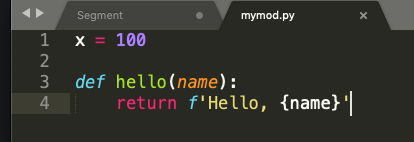

In [6]:
import mymod    #<-- import .py file starting in current directory

In [2]:
dir(mymod) 

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'hello',
 'x']

In [3]:
mymod.__name__

'mymod'

In [4]:
# if i import abcd, then the abcd.__name__ will be 'abcd'

In [7]:
import importlib
importlib.reload(mymod)

__name__ == mymod


<module 'mymod' from '/Users/bwilke/Library/Mobile Documents/com~apple~CloudDocs/DataScience@SMU/_Lerner/ReuvenLernerAcePythonInterviews/mymod.py'>

In [8]:
# if i import abcd, then the abcd.__name__ will be 'abcd'
# but if i run mymod.py from command line then the __name__ will be '__main__'

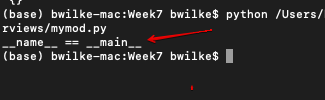

In [10]:
# this allows modules to know whether they're running on their own or as an import

In [12]:
__name__    #<-- sop this then, is the name of jupyter environment

'__main__'

In [13]:
class Foo():
    def __init__(self, x):
        self.x = x

f = Foo(10)
vars(f)

{'x': 10}

In [14]:
# classes are basically modules without an external file
Foo.__name__

'Foo'

# 35 String vs. Bytes

In [ ]:
# whats the difference between str and bytes type?

In [2]:
s = 'abcde'

In [3]:
type(s)  # doesn't contain bytes, contains characters

str

In [4]:
len(s)

5

In [5]:
s = 'שלום חברים'

In [6]:
type(s)

str

In [7]:
len(s)   # 10 characters,

10

In [ ]:
# in Python 2 ^^ this would've been length 20, because it referred to bytes. in that these characters are not
# ASCII so have to be represented by 2 bytes, not 1

In [ ]:
# unicode "let's give a every character, symbol ever a unique identifier"
#
# python uses UTF-8, which utilizes a multi-byte construct, that is flexible. some characters need 2 bytes,
# some need up to 5 or 6 bytes
# WE DON'T CARE ABOUT BYTES WE CARE ABOUT CHARACTERS

# python strings can contain any unicode character

In [ ]:
# byte strings



In [8]:
b = b'שלום חברים'

SyntaxError: bytes can only contain ASCII literal characters. (<ipython-input-8-ea608f0a7e50>, line 1)

In [ ]:
# you cannot take these multibyte characters and jam them into a byte string.

In [9]:
s.encode()

b'\xd7\xa9\xd7\x9c\xd7\x95\xd7\x9d \xd7\x97\xd7\x91\xd7\xa8\xd7\x99\xd7\x9d'

In [10]:
b = b'\xd7\xa9\xd7\x9c\xd7\x95\xd7\x9d \xd7\x97\xd7\x91\xd7\xa8\xd7\x99\xd7\x9d'

In [11]:
b

b'\xd7\xa9\xd7\x9c\xd7\x95\xd7\x9d \xd7\x97\xd7\x91\xd7\xa8\xd7\x99\xd7\x9d'

In [12]:
b.decode()  #<-- turn bytes into characters using UTF-8

'שלום חברים'

# 36 Operator Overloading

In [ ]:
# how does operator overloading work in python? give examples -- len, [], and +

In [13]:
2 + 3

5

In [14]:
'abcd' + 'gfghjj'

'abcdgfghjj'

In [15]:
[34,56,'fg'] + [34,'gbfb',45]

[34, 56, 'fg', 34, 'gbfb', 45]

In [ ]:
# the short of it for writing your own overload capable objects is to understant which method is being invoked
# by the operator.. and write that method.

In [16]:
class Person():
    def __init__(self, name):
        self.name = name

p = Person('Reuven')


In [17]:
len(p)

TypeError: object of type 'Person' has no len()

In [18]:
class Person():
    def __init__(self, name):
        self.name = name
    
    def __len__(self):
        return len(self.name)
    
p = Person('Reuven')
len(p)

6

In [ ]:
# ^^ the operator above is looking for the implementation of __len__

In [19]:
p[3]    #<-- in the same way this is looking for __getitem__ to be implemented

TypeError: 'Person' object does not support indexing

In [21]:
class Person():
    def __init__(self, name):
        self.name = name
    
    def __len__(self):
        return len(self.name)
    
    def __getitem__(self, index):
        return self.name[index]
    
p = Person('Reuven')

p[3]       #<-- p.__getitem__(3)

'v'

In [22]:
p[2:4]    #<-- slices work, too

'uv'

In [23]:
p1 = Person('name1')
p2 = Person('name2')

In [25]:
p1 + p2         #<-- this invokes the __add__ method, needs to be implemented

TypeError: unsupported operand type(s) for +: 'Person' and 'Person'

In [26]:
class Person():
    def __init__(self, name):
        self.name = name
    
    def __len__(self):
        return len(self.name)
    
    def __getitem__(self, index):
        return self.name[index]
    
    def __add__(self, other):
        return Person(self.name + other.name)
    
p1 = Person('name1')
p2 = Person('name2')

p1 + p2     #<<---   p1.__add__(p2)

In [27]:
p3 = p1 + p2
p3.name

'name1name2'

In [28]:
p1 + 'abc'    #   p1.__add__('abc')

AttributeError: 'str' object has no attribute 'name'

In [31]:
class Person():
    def __init__(self, name):
        self.name = name
    
    def __len__(self):
        return len(self.name)
    
    def __getitem__(self, index):
        return self.name[index]
    
    def __add__(self, other):
        if hasattr(other, 'name'):
            return Person(self.name + other.name)
        else:
            return Person(self.name + str(other))
    
p1 = Person('name1')
p2 = Person('name2')

p3 = p1 + 'abc'    #   p1.__add__('abc')

p3.name

'name1abc'

# 37 Whitespace separated numbers

In [37]:
# get input of whitespace separated numbers in a string 
# return a list of integers sorted from highest to lowest 


stringofnumbers = input() "12 45 675 34 65 789 543 213 5678"

split = [int(each) for each in stringofnumbers.split()]

sorted(split, reverse=True)

[5678, 789, 675, 543, 213, 65, 45, 34, 12]